In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from matplotlib.offsetbox import AnchoredText


pd.set_option("display.max_columns", None)

In [2]:
bank = pd.read_csv("../data/bank.csv")
bank.describe()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,37444.000000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,5625.000000,41188.000000,36040.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.999947,0.000092,0.536743,0.155431,2.567593,5.149443,0.172963,0.244089,0.081886,93.575575,-40.502600,3.621291,5167.035911,0.112654
std,10.414908,0.009594,0.498654,0.362319,2.770014,1.000012,0.494901,0.429584,1.570960,0.579216,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,5.344857,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,0.000000,1.000000,0.000000,2.000000,5.344857,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,3.000000,5.344857,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,1.000000,1.000000,1.000000,56.000000,5.344857,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  float64
 12  previous        41188 non-null  int64  
 13  poutcome        5625 non-null   float64
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  36040 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

### Features analysis


<AxesSubplot:xlabel='previous', ylabel='Count'>

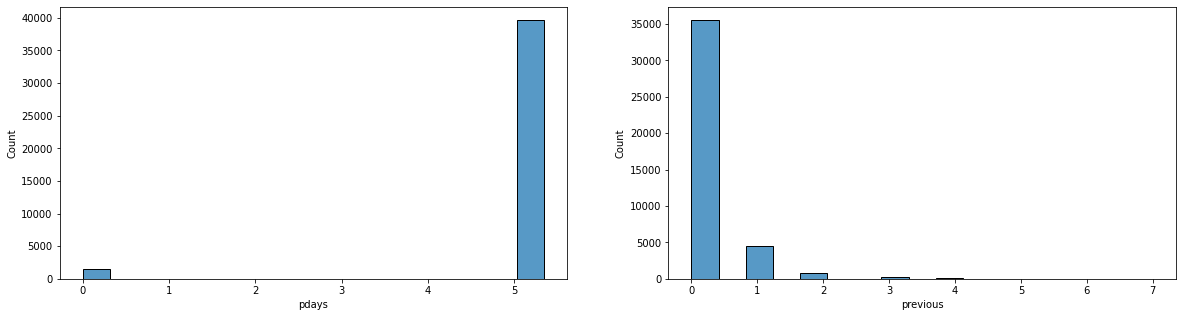

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))


sns.histplot(bank["pdays"], ax = ax[0])
sns.histplot(bank["previous"], ax = ax[1])

In [5]:
bank["y"] = bank["y"].map({1: "yes", 0: "no"})
conti_feature = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed']

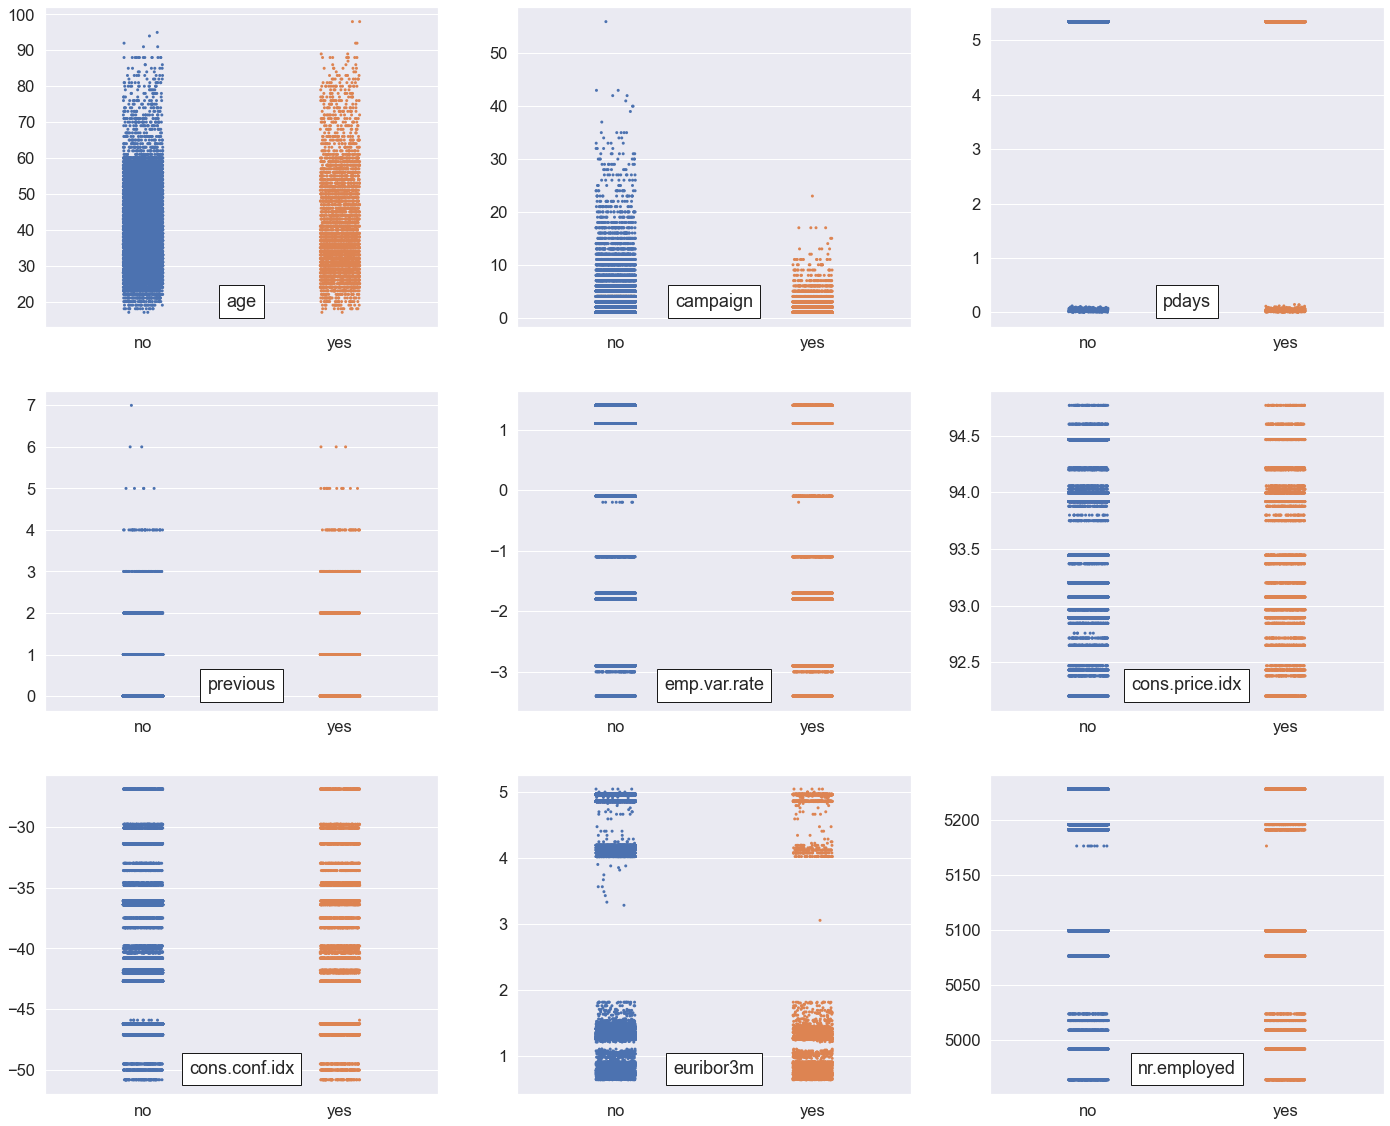

In [18]:
fig = plt.figure(figsize = (24, 20))
sns.set(font_scale = 1.5)
for i in range(len(conti_feature)):
    fig.add_subplot(3, 3, i + 1)
    ax = sns.stripplot(y = conti_feature[i], x = "y", data = bank,
                       jitter = True, s = 3)
    anchoredtext = AnchoredText(conti_feature[i], loc = 'lower center')
    ax.add_artist(anchoredtext)
    plt.xlabel("")
    plt.ylabel("")

plt.show()

In [7]:
non_conti_feature = bank.columns[~bank.columns.isin(conti_feature)].tolist()
non_conti_feature.pop()
bank[non_conti_feature] = bank[non_conti_feature].astype("category")
bank[non_conti_feature] = bank[non_conti_feature].replace(1, "yes")
bank[non_conti_feature] = bank[non_conti_feature].replace(0, "no")

"""
job = ['unemployed', 'retired', 'blue-collar', 'services', 'self-employed',
       'admin.', 'technician', 'management', 'entrepreneur']

job_map = {i: job[i] for i in range(len(job))}

edu = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree']

edu_map = {i: edu[i] for i in range(len(edu))}

print(job_map)
print(edu_map)

bank["job"] = bank["job"].map(job_map)
bank["education"] = bank["education"].map(edu_map)
"""

bank[non_conti_feature].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,5625
unique,11,3,7,2,2,2,2,10,5,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,4252


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37444 non-null  float64 
 1   job             40858 non-null  category
 2   marital         41108 non-null  category
 3   education       39457 non-null  category
 4   default         32591 non-null  category
 5   housing         40198 non-null  category
 6   loan            40198 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  float64 
 12  previous        41188 non-null  int64   
 13  poutcome        5625 non-null   category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  36040 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

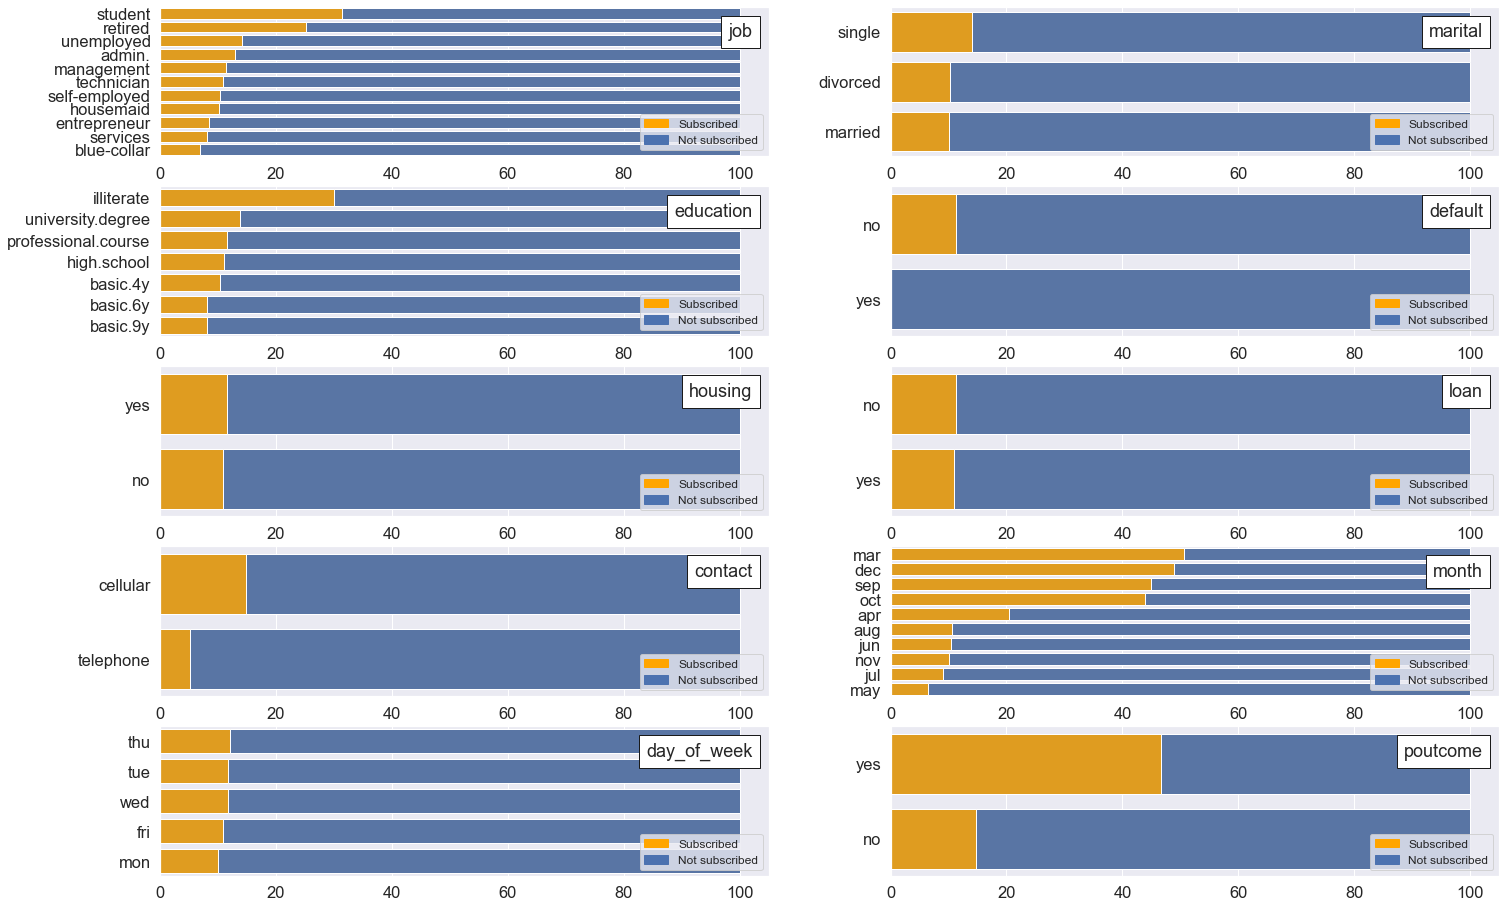

In [9]:
#counts = bank.groupby(["y"]).count()
fig = plt.figure(figsize = (24, 16))
fig.tight_layout()
bank[non_conti_feature] = bank[non_conti_feature].replace()
for i in range(len(non_conti_feature)):
    fig.add_subplot(5, 2, i + 1)
    tab = pd.crosstab(bank[non_conti_feature[i]], bank["y"])
    tab = tab.div(tab.sum(axis = 1).astype("float"), axis = 0) * 100
    tab = tab.iloc[:, ::-1].sort_values("yes", ascending = False)
    tab["total"] = [100] * len(tab)
    tab["cate"] = tab.index.to_series()

    ax1 = sns.barplot(x = "total", y = "cate", data = tab, color = "b")
    ax2 = sns.barplot(x = "yes", y = "cate", data = tab, color = "orange",
                      order = tab["cate"])
    plt.xlabel("")
    plt.ylabel("")

    anchoredtext = AnchoredText(non_conti_feature[i], loc = 'upper right')
    ax2.add_artist(anchoredtext)
    yes = mpatches.Patch(color = "orange", label = "Subscribed")
    no = mpatches.Patch(color = "b", label = "Not subscribed")
    plt.legend(handles = [yes, no], loc = "lower right", fontsize = 12)

In [10]:
# Run Pearson’s Chi-Squared Test

chi2_month = pd.crosstab(index = bank["y"], columns = bank["month"],
                         margins = False)
print(chi2_month)
print(chi2_contingency(chi2_month))

chi2_day = pd.crosstab(index = bank["y"], columns = bank["day_of_week"],
                       margins = False)
print(chi2_day)
print(chi2_contingency(chi2_day))


month   apr   aug  dec   jul   jun  mar    may   nov  oct  sep
y                                                             
no     2093  5523   93  6525  4759  270  12883  3685  403  314
yes     539   655   89   649   559  276    886   416  315  256
(3101.1493514116773, 0.0, 9, array([[ 2335.49422162,  5482.02253083,   161.49694086,  6365.8189764 ,
         4718.905118  ,   484.49082257, 12217.86471788,  3639.00524425,
          637.11430514,   505.78712246],
       [  296.50577838,   695.97746917,    20.50305914,   808.1810236 ,
          599.094882  ,    61.50917743,  1551.13528212,   461.99475575,
           80.88569486,    64.21287754]]))
day_of_week   fri   mon   thu   tue   wed
y                                        
no           6981  7667  7578  7137  7185
yes           846   847  1045   953   949
(26.14493907587197, 2.9584820052785324e-05, 4, array([[6945.25580266, 7554.8623871 , 7651.58308245, 7178.62775566,
        7217.67097213],
       [ 881.74419734,  959.1376129 ,  9


Only "Campaign" looks significant. -> People are less likely to subscribe as phone calls get more frequent.


### Correlation heatmap

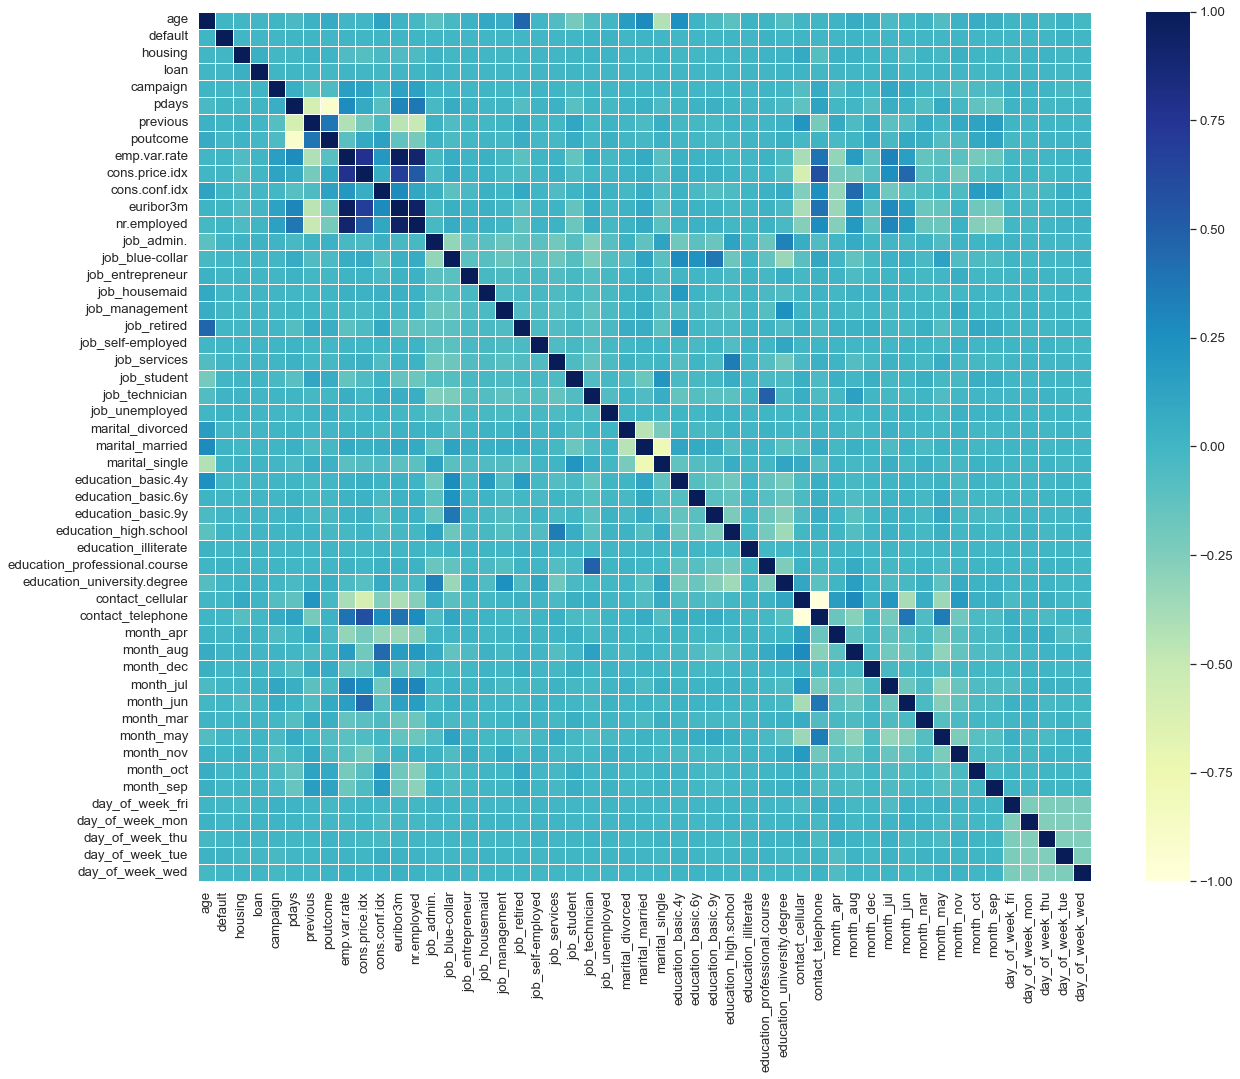

In [11]:
bank_flattened = pd.read_csv("../data/bank_imputed_imp.csv")
bank_y = bank_flattened["y"]
bank_flattened = bank_flattened.drop(columns = ["y"])

plt.figure(figsize = (20, 16))
sns.set(font_scale = 1.2)
sns.heatmap(bank_flattened.corr(), cmap = "YlGnBu", linewidth = 1)
plt.show()

Focus on the highly correlated region

In [12]:
bank_flattened.iloc[:, 7:14].corr()

,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.
poutcome,1.000000,-0.097594,0.086735,0.143462,-0.126917,-0.215518,0.024910
emp.var.rate,-0.097594,1.000000,0.776245,0.196041,0.972245,0.906970,-0.024572
cons.price.idx,0.086735,0.776245,1.000000,0.058930,0.689166,0.523023,-0.041824
cons.conf.idx,0.143462,0.196041,0.058930,1.000000,0.277686,0.100513,0.032341
euribor3m,-0.126917,0.972245,0.689166,0.277686,1.000000,0.945154,-0.023831
nr.employed,-0.215518,0.906970,0.523023,0.100513,0.945154,1.000000,-0.023446
job_admin.,0.024910,-0.024572,-0.041824,0.032341,-0.023831,-0.023446,1.000000


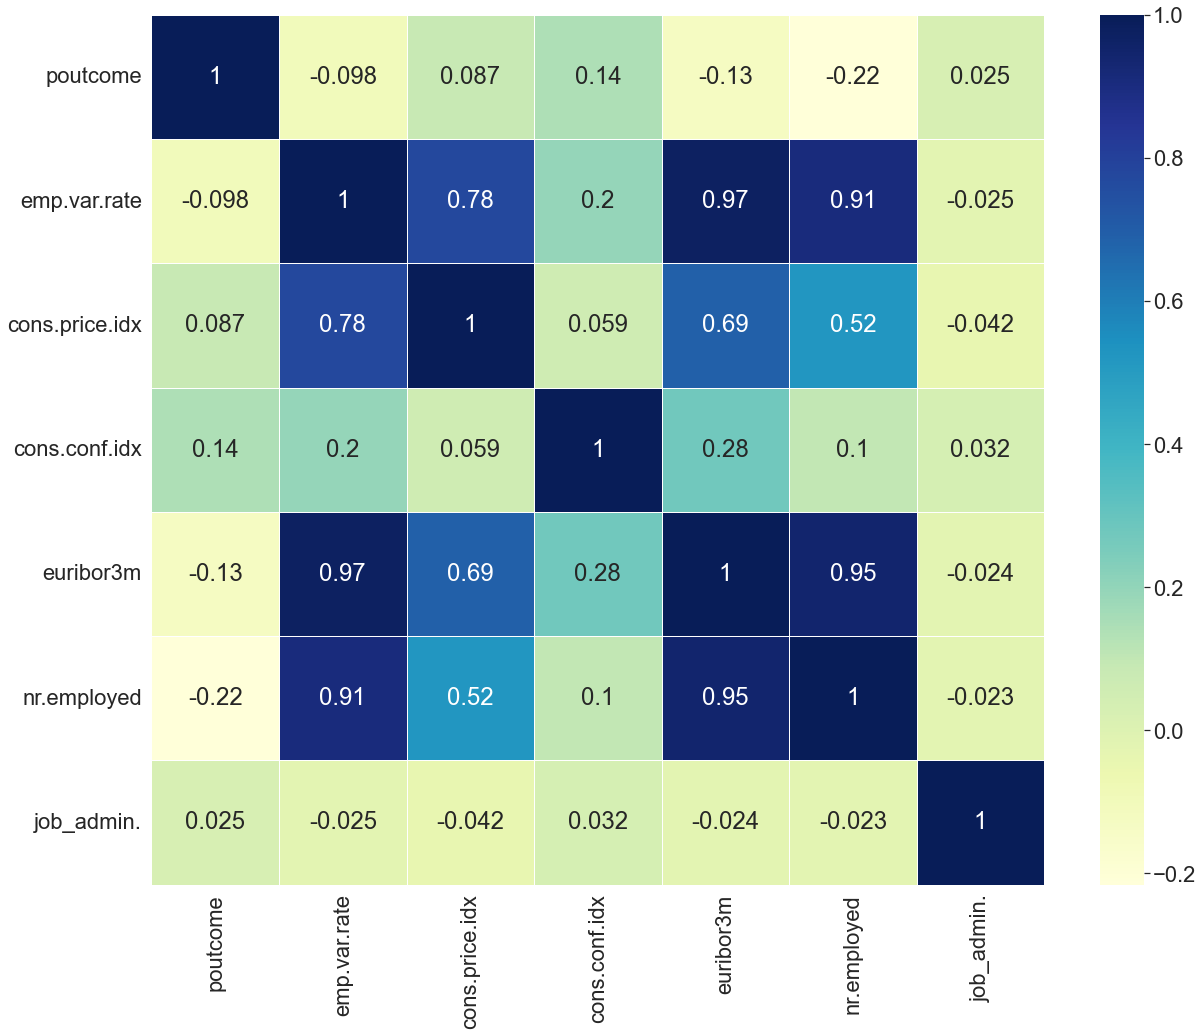

In [13]:
plt.figure(figsize = (20, 16))
sns.set(font_scale = 2)
sns.heatmap(bank_flattened.iloc[:, 7:14].corr(), cmap = "YlGnBu", linewidth = 1,
            annot = True)
plt.show()

### Observations and conclusions

- More frequent phone calls, less likely to get subscription.
- Social and economic context attributes are highly correlated, which makes sense.
-


In [14]:
# feature selection for logistic regression
bank_flattened = bank_flattened.drop(
    columns = ["emp.var.rate", "poutcome", "pdays", "euribor3m", "contact_telephone", "marital_married", "marital_divorced", "cons.price.idx"])

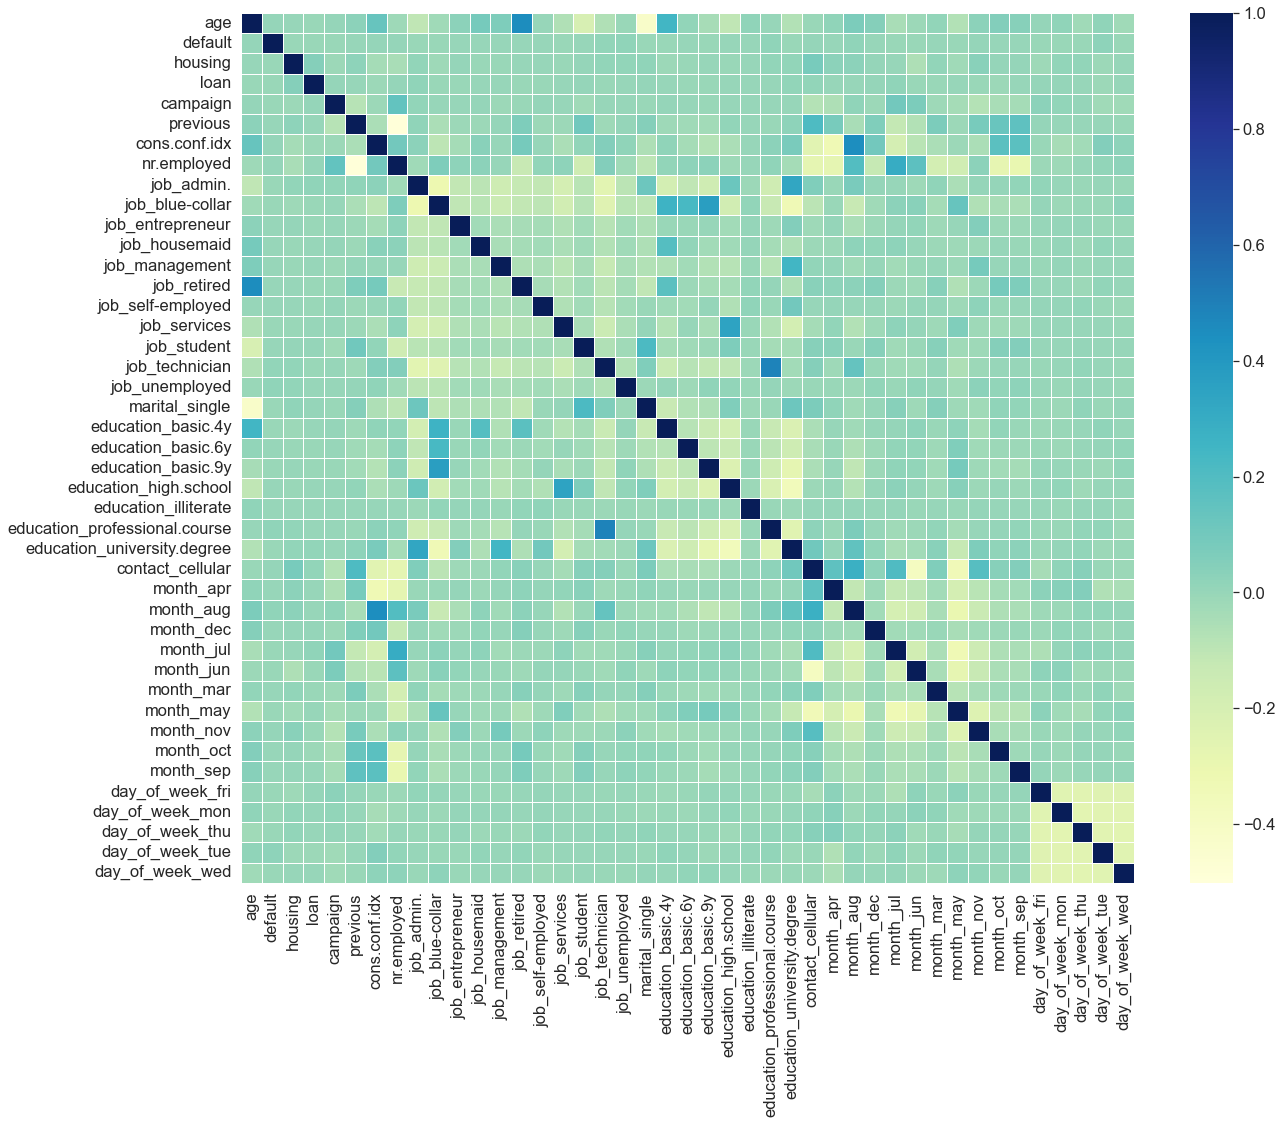

In [15]:
bank_flattened.join(bank_y).to_csv("../data/bank_selected.csv", index = False)
plt.figure(figsize = (20, 16))
sns.set(font_scale = 1.5)
sns.heatmap(bank_flattened.corr(), cmap = "YlGnBu", linewidth = 1)
plt.show()

In [16]:
np.sum(bank_flattened.corr() > 0.7)


age                              1
default                          1
housing                          1
loan                             1
campaign                         1
previous                         1
cons.conf.idx                    1
nr.employed                      1
job_admin.                       1
job_blue-collar                  1
job_entrepreneur                 1
job_housemaid                    1
job_management                   1
job_retired                      1
job_self-employed                1
job_services                     1
job_student                      1
job_technician                   1
job_unemployed                   1
marital_single                   1
education_basic.4y               1
education_basic.6y               1
education_basic.9y               1
education_high.school            1
education_illiterate             1
education_professional.course    1
education_university.degree      1
contact_cellular                 1
month_apr           